In [30]:
import numpy as np
import cv2
import os
from scipy.interpolate import interp1d

def compress_channel(channel, k):
    """Nén 1 kênh màu bằng SVD với k thành phần chính"""
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :], U, S, Vt  # Trả về ảnh nén và các ma trận SVD

def compress_image(image, k):
    """Nén ảnh màu bằng SVD"""
    compressed_channels = []
    svd_data = []  # Lưu U, S, Vt cho việc khôi phục

    for i in range(3):
        compressed, U, S, Vt = compress_channel(image[:, :, i], k)
        compressed_channels.append(compressed)
        svd_data.append((U, S, Vt))

    return np.clip(np.stack(compressed_channels, axis=2), 0, 255).astype(np.uint8), svd_data

def interpolate_singular_values(S, k_target):
    """Nội suy giá trị kỳ dị để tăng k lên k_target"""
    k_existing = len(S)
    x_existing = np.arange(k_existing)
    x_target = np.arange(k_target)
    
    f_interp = interp1d(x_existing, S, kind='quadratic', fill_value='extrapolate')
    S_interpolated = f_interp(x_target)
    S_interpolated[S_interpolated < 0] = 0  # Đảm bảo không có giá trị âm
    
    return S_interpolated

def recover_channel(U, S, Vt, k_existing, k_target):
    """Khôi phục một kênh màu với số k giá trị kỳ dị, có nội suy"""
    S_new = interpolate_singular_values(S[:k_existing], k_target)
    return np.clip(U[:, :k_target] @ np.diag(S_new) @ Vt[:k_target, :], 0, 255)

def recover_image(svd_data, k_existing, k_target):
    """Khôi phục ảnh từ dữ liệu SVD có nội suy"""
    recovered_channels = [recover_channel(U, S, Vt, k_existing, k_target) for U, S, Vt in svd_data]
    return np.clip(np.stack(recovered_channels, axis=2), 0, 255).astype(np.uint8)

# Đọc ảnh và chuyển sang RGB
image_path = os.path.join("img.jpg")
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bước 1: Nén ảnh với k = 20
k_compressed = 20
compressed_img, svd_data = compress_image(image, k_compressed)

# Bước 2: Từ ảnh đã nén, cố gắng khôi phục với k = 50 bằng nội suy
k_recovered = 50
recovered_img = recover_image(svd_data, k_compressed, k_recovered)

# Lưu ảnh khôi phục
cv2.imwrite("recovered.jpg", cv2.cvtColor(recovered_img, cv2.COLOR_RGB2BGR))

True

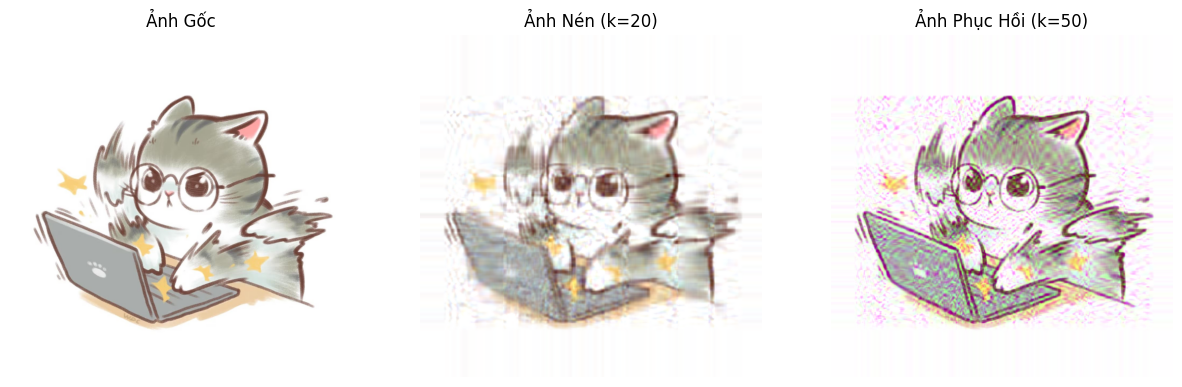

In [31]:
# Hiển thị kết quả
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes[0].imshow(image)
axes[0].set_title("Ảnh Gốc")
axes[0].axis('off')

axes[1].imshow(compressed_img)
axes[1].set_title(f"Ảnh Nén (k={k_compressed})")
axes[1].axis('off')

axes[2].imshow(recovered_img)
axes[2].set_title(f"Ảnh Phục Hồi (k={k_recovered})")
axes[2].axis('off')

plt.show()

In [22]:
pip install opencv-contrib-python


   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/46.2 MB 1.1 MB/s eta 0:00:41
    --------------------------------------- 0.8/46.2 MB 1.2 MB/s eta 0:00:40
    --------------------------------------- 1.0/46.2 MB 1.2 MB/s eta 0:00:37
   - -------------------------------------- 1.3/46.2 MB 1.2 MB/s eta 0:00:38
   - -------------------------------------- 1.6/46.2 MB 1.2 MB/s eta 0:00:38
   - -------------------------------------- 1.6/46.2 MB 1.2 MB/s eta 0:00:38
   - -------------------------------------- 1.8/46.2 MB 1.1 MB/s eta 0:00:41
   - -------------------------------------- 1.8/46.2 MB 1.1 MB/s eta 0:00:41
   - -------------------------------------- 1.8/46.2 MB 1.1 MB/s eta 0:00:41
   - -------------------------------------- 1.8/46.2 MB 1.1 MB/s eta 0:00:41
   - ---------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\anhkh\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
